# Algoritmo 3: Detección de placas blancas

En primer lugar se importan todos los paquetes y módulos necesarios

In [1]:
import numpy as np
import cv2 #This is openCV
import matplotlib.pyplot as plt 

Se sube la imagen y se pasa de formato BGR a escala de grises

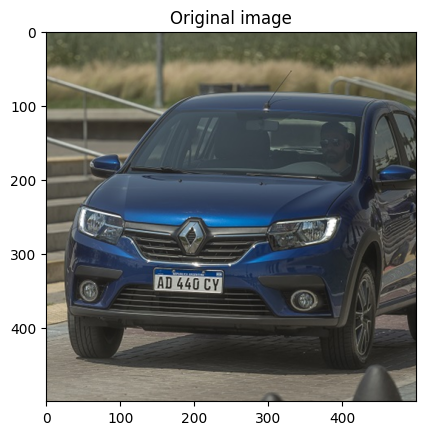

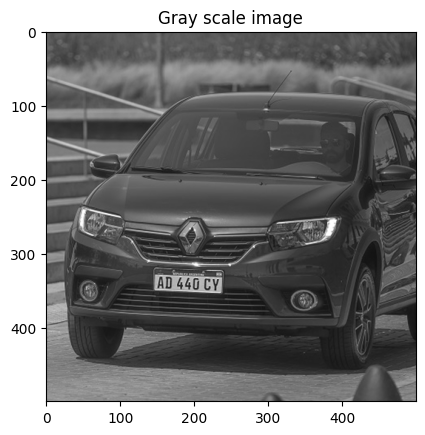

In [2]:
img_original = cv2.imread('Fig/000.png', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)

plt.title("Original image")
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

Se aplica una umbralización con el propósito principal de separar las regiones blancas (posibles placas) y se invierte la imagen

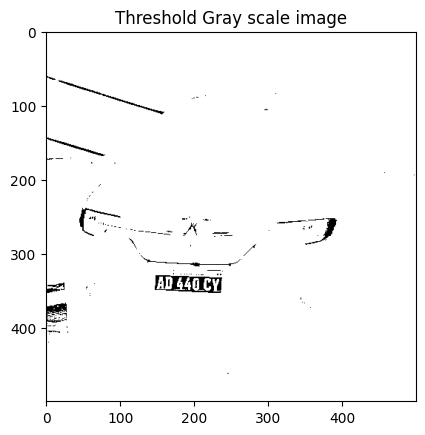

In [3]:
thres = cv2.threshold(img_gray, 170, 255, cv2.THRESH_BINARY_INV)[1]
plt.title("Threshold Gray scale image")
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_BGR2RGB))
plt.show()

Se hallan los contornos y se dibujan en un fondo negro con un grosor de 2

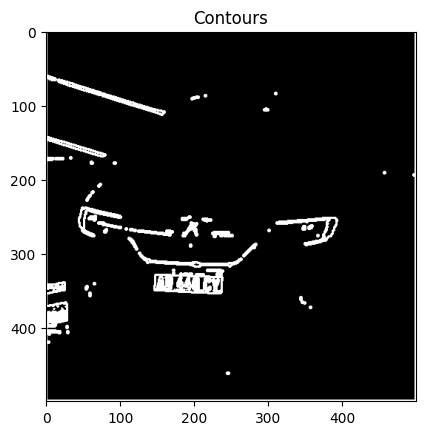

In [5]:
contours = cv2.findContours(thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
black_background = np.zeros_like(thres) 
cv2.drawContours(black_background, contours, -1, (255), 2)
plt.title("Contours")
plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
plt.show()

Se filtran aquellos contornos que cumplen con características de ancho, altura, relación de ancho y altura en pixeles.
* Ancho mínimo: 80
* Ancho máximo: 110
* Altura mínima: 25
* Altura máxima: 52
* Relación de ancho / altura = 3.07692307692

In [6]:
ratio = 3.07692307692
min_w = 80
max_w = 110
min_h = 25
max_h = 52 
candidates = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    if (np.isclose(aspect_ratio, ratio, atol=0.7) and (max_w > w > min_w) and
    (max_h > h > min_h)):
        candidates.append(cnt)    

Se dibujan aquellos contornos que cumplen las características

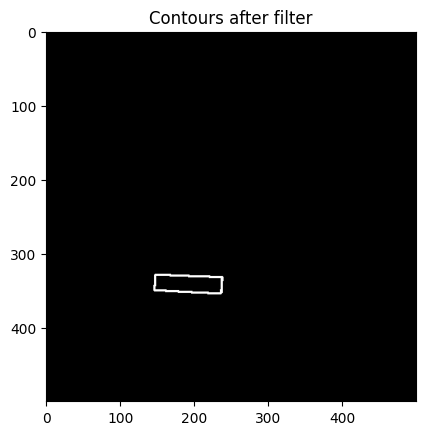

In [7]:
black_background = np.zeros_like(thres) 
cv2.drawContours(black_background, candidates, -1, (255), 2)
plt.title("Contours after filter")
plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
plt.show()

Se selecciona el contorno cuya coordenada en *y* sea la mayor. Después de examinar los resultados se determinó que los contornos correspondientes a la placa, en caso de que el filtrado arrojara más de un contorno, se encontraban en la parte inferior de la imagen. El contorno seleccionado se dibuja sobre un fondo negro.

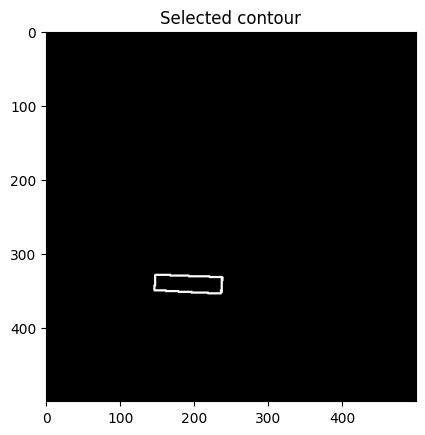

In [9]:
ys = []
for cnt in candidates:
    x, y, w, h = cv2.boundingRect(cnt)
    ys.append(y)
selected_contour = candidates[np.argmax(ys)]
black_background = np.zeros_like(thres) 
cv2.drawContours(black_background, [selected_contour], -1, (255), 2)
plt.title("Selected contour")
plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
plt.show()

Se selecciona la zona de la imagen original correspondiente al contorno seleccionado y se grafica.

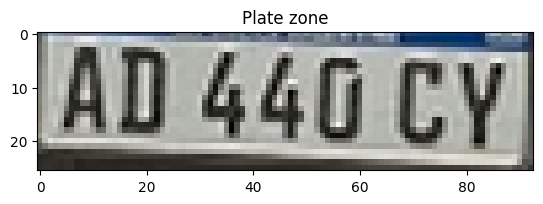

In [10]:
x, y, w, h = cv2.boundingRect(selected_contour)
plate_zone = img_original[y:y+h,x:x+w]
plt.imshow(cv2.cvtColor(plate_zone, cv2.COLOR_BGR2RGB))
plt.title("Plate zone")
plt.show()

Esta imagen es después pasada por el algoritmo de verificación para comprobar si efectivamente se trata de una placa. 